In [1]:
cd /orange/adamginsburg/salt

/orange/adamginsburg/salt


In [2]:
import glob

In [3]:
spectra_dirs = glob.glob("sanhueza/*/spectra") + glob.glob("*/spectra")
spectra_dirs

['sanhueza/NGC6334I/spectra',
 'sanhueza/G5.89/spectra',
 'sanhueza/IRAS16547/spectra',
 'sanhueza/G333/spectra',
 'sanhueza/W33A/spectra',
 'sanhueza/I16562/spectra',
 'sanhueza/G335/spectra',
 'sanhueza/G34.43/spectra',
 'sanhueza/IRAS18162/spectra',
 'sanhueza/G351.77/spectra',
 'sanhueza/NGC6334IN/spectra',
 'sanhueza/G29.96/spectra',
 'sanhueza/G11/spectra',
 'sanhueza/IRAS18089/spectra',
 'maud/spectra',
 'notebooks/spectra',
 'YichenKei/spectra',
 '2022_dihca_disks/spectra',
 'plambeck/spectra',
 's255ir/spectra',
 'orion/spectra',
 'beuther/spectra',
 'sanhueza/spectra',
 'G351/spectra',
 'I16547/spectra']

In [4]:
ls I16547/spectra/

figures/
I16547A.reg@
I16547B.reg@
I16547IRAS16547.217980MHz.NaCl_v=2.image.pbcor_I16547A_meanspec.fits
I16547IRAS16547.217980MHz.NaCl_v=2.image.pbcor_I16547B_meanspec.fits
I16547IRAS16547.219615MHz.NaCl_v=1.image.pbcor_I16547A_meanspec.fits
I16547IRAS16547.219615MHz.NaCl_v=1.image.pbcor_I16547B_meanspec.fits
I16547IRAS16547.232510MHz.NaCl_v=1.image.pbcor_I16547A_meanspec.fits
I16547IRAS16547.232510MHz.NaCl_v=1.image.pbcor_I16547B_meanspec.fits
I16547IRAS16547.234252MHz.NaCl.image.pbcor_I16547A_meanspec.fits
I16547IRAS16547.234252MHz.NaCl.image.pbcor_I16547B_meanspec.fits
I16547IRAS16547.350969MHz.NaCl.image.pbcor_I16547A_meanspec.fits
I16547IRAS16547.350969MHz.NaCl.image.pbcor_I16547B_meanspec.fits
I16547IRAS16547.353522MHz.Na37Cl.16chan.image.pbcor_I16547A_meanspec.fits
I16547IRAS16547.353522MHz.Na37Cl.16chan.image.pbcor_I16547B_meanspec.fits
I16547IRAS16547.Band3.spw0.selfcal.4chan.rp.image.pbcor_I16547A_meanspec.fits
I16547IRAS16547.Band3.spw0.selfcal.4chan.rp.image.pbcor_I16547B_m

In [5]:
ls 'sanhueza/G34.43/spectra'

figures/
G34.43+0.24.config8.spw0.robust0.5.image_co1_smaller_G34.43mm1_meanspec.fits
G34.43+0.24.config8.spw0.robust0.5.image_co1_smaller_G34.43mm1_stack.fits
G34.43+0.24.config8.spw0.robust0.5.image_co1_smaller_meanspec.fits
G34.43+0.24.config8.spw0.robust0.5.image_co1_smaller_stack.fits
G34.43+0.24.config8.spw1.robust0.5.image_co1_smaller_G34.43mm1_meanspec.fits
G34.43+0.24.config8.spw1.robust0.5.image_co1_smaller_G34.43mm1_stack.fits
G34.43+0.24.config8.spw1.robust0.5.image_co1_smaller_meanspec.fits
G34.43+0.24.config8.spw1.robust0.5.image_co1_smaller_stack.fits
G34.43+0.24.config8.spw2.robust0.5.image_co1_smaller_G34.43mm1_meanspec.fits
G34.43+0.24.config8.spw2.robust0.5.image_co1_smaller_G34.43mm1_stack.fits
G34.43+0.24.config8.spw2.robust0.5.image_co1_smaller_meanspec.fits
G34.43+0.24.config8.spw2.robust0.5.image_co1_smaller_stack.fits
G34.43+0.24.config8.spw3.robust0.5.image_co1_smaller_G34.43mm1_meanspec.fits
G34.43+0.24.config8.spw3.robust0.5.image_co1_smaller_G34.43mm1_stack

In [6]:
import socket
socket.gethostname()

'c0710a-s22.ufhpc'

In [7]:
import sys
sys.path.append('/orange/adamginsburg/salt/Orion_ALMA_2016.1.00165.S/analysis/')

In [8]:
%matplotlib inline
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
from spectral_cube import SpectralCube
from astropy import units as u
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2b9755804d00>

import warnings
with warnings.catch_warnings():
    warnings.simplefilter('error')
    %run -i /orange/adamginsburg/salt/code/line_fitting_G17.py

In [9]:
import warnings
warnings.simplefilter('ignore')

In [10]:
import pyspeckit
from astropy import constants

In [11]:
sp_st = pyspeckit.Spectrum("I16547/spectra/IRAS16547IRAS16547.Band6.spw0.selfcal.lowcontsub.rp.image.pbcor_A_stack.fits")
sp_mn = pyspeckit.Spectrum("I16547/spectra/I16547IRAS16547.Band6.spw0.selfcal.lowcontsub.rp.image.pbcor_I16547A_meanspec.fits")
sp_mn.xarr.convert_to_unit(u.GHz)
sp_st.xarr *= (1+27*u.km/u.s / constants.c).value
sp_st.xarr.convert_to_unit(u.GHz)

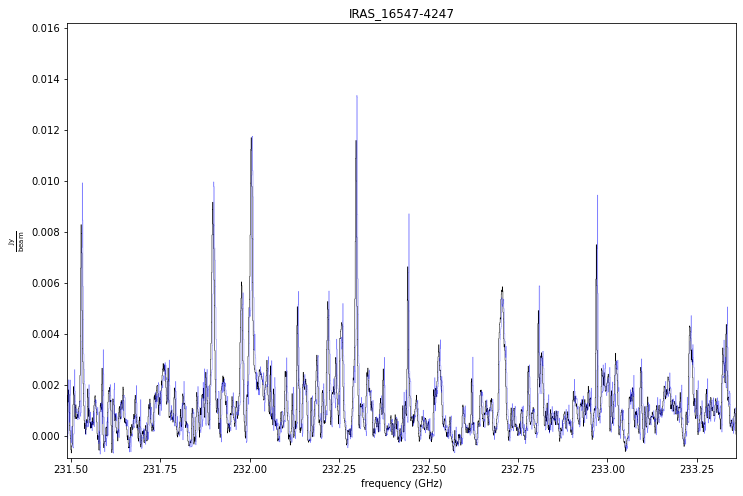

In [12]:
fig = pl.figure(figsize=(12,8))
sp_st.plotter(figure=fig)
sp_mn.plotter(color='b', axis=sp_st.plotter.axis, clear=False, alpha=0.5)

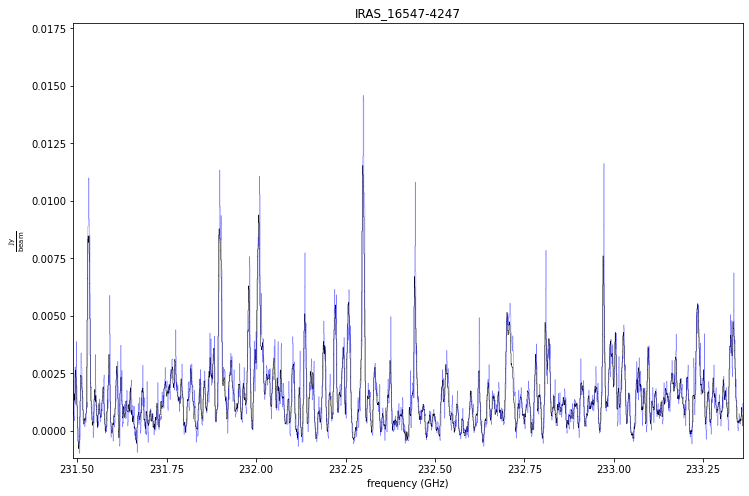

In [13]:
sp_st = pyspeckit.Spectrum("I16547/spectra/IRAS16547IRAS16547.Band6.spw0.selfcal.lowcontsub.rp.image.pbcor_B_stack.fits")
sp_mn = pyspeckit.Spectrum("I16547/spectra/I16547IRAS16547.Band6.spw0.selfcal.lowcontsub.rp.image.pbcor_I16547B_meanspec.fits")
sp_mn.xarr.convert_to_unit(u.GHz)
sp_st.xarr *= (1+27*u.km/u.s / constants.c).value
sp_st.xarr.convert_to_unit(u.GHz)

fig = pl.figure(figsize=(12,8))
sp_st.plotter(figure=fig)
sp_mn.plotter(color='b', axis=sp_st.plotter.axis, clear=False, alpha=0.5)

In [14]:
ls maud/spectra

figures/
G17_SPW0_2017.image_maxspec.fits
G17_SPW0_2017.image_meanspec.fits
G17_SPW0_2017.image_moment_stack.fits
G17_SPW0_2017.image_stack.fits
G17_SPW1_2017.image_maxspec.fits
G17_SPW1_2017.image_meanspec.fits
G17_SPW1_2017.image_moment_stack.fits
G17_SPW1_2017.image_stack.fits
G17_SPW2_2017.image_maxspec.fits
G17_SPW2_2017.image_meanspec.fits
G17_SPW2_2017.image_moment_stack.fits
G17_SPW2_2017.image_stack.fits
G17_SPW3_2017.image_maxspec.fits
G17_SPW3_2017.image_meanspec.fits
G17_SPW3_2017.image_moment_stack.fits
G17_SPW3_2017.image_stack.fits
member.uid___A001_X1528_X2a2.AFGL_2136_IRS_1_sci.spw19.cube.I.pbcor_meanspec.fits
member.uid___A001_X1528_X2a2.AFGL_2136_IRS_1_sci.spw19.cube.I.pbcor_stack.fits
member.uid___A001_X1528_X2a2.AFGL_2136_IRS_1_sci.spw25.cube.I.pbcor_meanspec.fits
member.uid___A001_X1528_X2a2.AFGL_2136_IRS_1_sci.spw25.cube.I.pbcor_stack.fits
NaCl_v_le_3_stackcube_meanspec.fits


In [15]:
import numpy as np
import radio_beam

In [16]:
pyspeckit.spectrum.models.hydrogen.rrl??

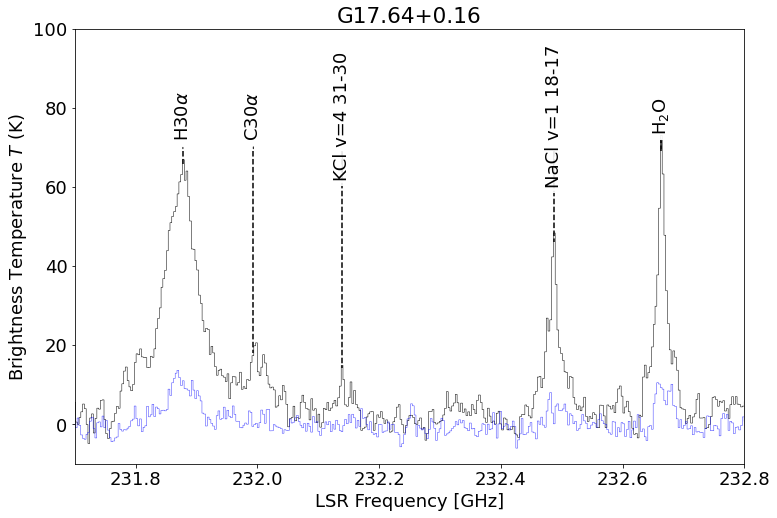

In [17]:
pl.rcParams['font.size'] = 18

sp_st = pyspeckit.Spectrum("maud/spectra/G17_SPW2_2017.image_stack.fits")
sp_st.unit = u.Jy/u.beam
sp_st.xarr.convert_to_unit(u.GHz)
sp_st.xarr = sp_st.xarr * (1 - 30*u.km/u.s / constants.c).value

sp_mn = pyspeckit.Spectrum("maud/spectra/G17_SPW2_2017.image_meanspec.fits")
sp_mn.xarr.convert_to_unit(u.GHz)

beam = radio_beam.Beam.from_fits_header(sp_st.header)
jytok = beam.jtok(sp_st.xarr)
sp_st.data *= jytok.value
sp_st.unit = u.K
sp_st.data -= np.nanpercentile(sp_st.data, 25)

jytok = beam.jtok(sp_mn.xarr)
sp_mn.data *= jytok.value
sp_mn.unit = u.K


sp_st.smooth(3)
sp_mn.smooth(3)



fig = pl.figure(figsize=(12,8))
sp_st.plotter(figure=fig,)
axlims = sp_st.plotter.axis.axis()
sp_mn.plotter(color='b', axis=sp_st.plotter.axis, clear=False, alpha=0.75, label='Average')
sp_st.plotter.axis.axis(axlims)
sp_st.plotter.axis.axis([231.7,232.8,-10,100])

# He30a: not detected 231.99542800
sp_st.plotter.line_ids([r'H30$\alpha$', 'KCl v=4 31-30', 'NaCl v=1 18-17', 'H$_2$O',  'C30$\\alpha$',  ],
                       [231.900928, 232.163002, 232.509950, 232.68670, 232.01663600]*u.GHz,
                       velocity_offset=30*u.km/u.s, 
                       label1_size=pl.rcParams['font.size'],
                       max_iter=300,
                       auto_yloc_fraction=0.8,
                       
                      )
for txt in sp_st.plotter.axis.texts:
    txt.set_backgroundcolor((1,1,1,0.9))

sp_st.plotter.axis.set_xlabel('LSR Frequency [GHz]')

fig.savefig("/orange/adamginsburg/salt/2022_dihca_disks/figures/G17_stacking_vs_not_example.pdf", bbox_inches='tight')

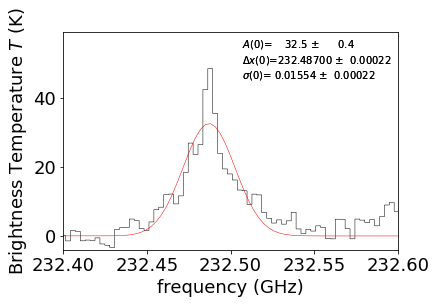

In [18]:
sp_st.plotter(xmin=232.4,xmax=232.6)
sp_st.specfit(fittype='gaussian', guesses=[50, 232.45, 0.01])

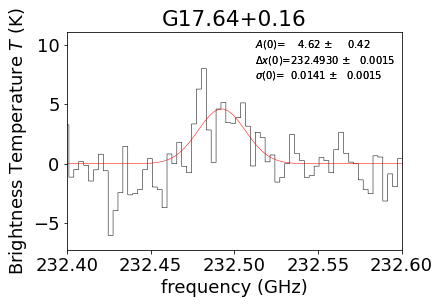

In [19]:
sp_mn.plotter(xmin=232.4,xmax=232.6)
sp_mn.specfit(fittype='gaussian', guesses=[50, 232.475, 0.01])

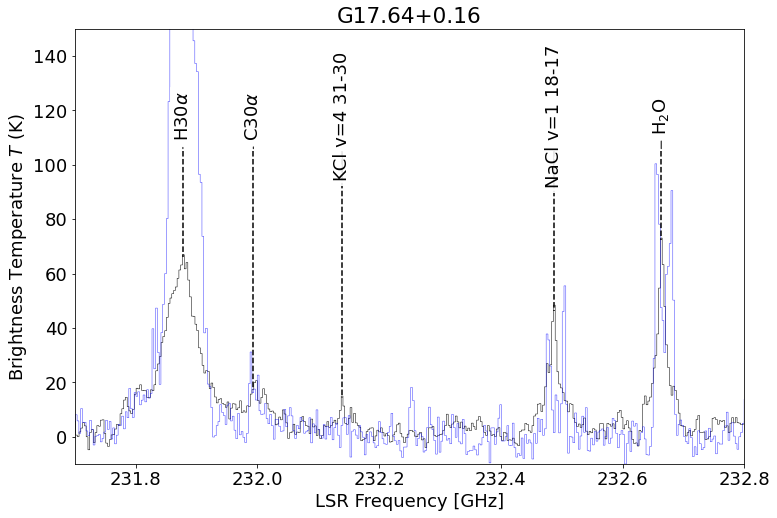

In [20]:
pl.rcParams['font.size'] = 18

sp_st = pyspeckit.Spectrum("maud/spectra/G17_SPW2_2017.image_stack.fits")
sp_st.unit = u.Jy/u.beam
sp_st.xarr.convert_to_unit(u.GHz)
sp_st.xarr = sp_st.xarr * (1 - 30*u.km/u.s / constants.c).value

sp_mn = pyspeckit.Spectrum("maud/spectra/G17_SPW2_2017.image_maxspec.fits")
sp_mn.xarr.convert_to_unit(u.GHz)

beam = radio_beam.Beam.from_fits_header(sp_st.header)
jytok = beam.jtok(sp_st.xarr)
sp_st.data *= jytok.value
sp_st.unit = u.K
sp_st.data -= np.nanpercentile(sp_st.data, 25)

jytok = beam.jtok(sp_mn.xarr)
sp_mn.data *= jytok.value
sp_mn.unit = u.K
sp_mn.data -= np.nanpercentile(sp_mn.data, 25)



sp_st.smooth(3)
sp_mn.smooth(3)



fig = pl.figure(figsize=(12,8))
sp_st.plotter(figure=fig,)
axlims = sp_st.plotter.axis.axis()
sp_mn.plotter(color='b', axis=sp_st.plotter.axis, clear=False, alpha=0.75, label='Max')
sp_st.plotter.axis.axis(axlims)
sp_st.plotter.axis.axis([231.7,232.8,-10,150])

sp_st.plotter.line_ids([r'H30$\alpha$', 'KCl v=4 31-30', 'NaCl v=1 18-17', 'H$_2$O',  'C30$\\alpha$',  ],
                       [231.900928, 232.163002, 232.509950, 232.68670, 232.01663600]*u.GHz,
                       velocity_offset=30*u.km/u.s, 
                       label1_size=pl.rcParams['font.size'],
                       max_iter=300,
                       auto_yloc_fraction=0.8,
                      )
for txt in sp_st.plotter.axis.texts:
    txt.set_backgroundcolor((1,1,1,0.9))

sp_st.plotter.axis.set_xlabel('LSR Frequency [GHz]')

fig.savefig("/orange/adamginsburg/salt/2022_dihca_disks/figures/G17_stacking_vs_max_example.pdf", bbox_inches='tight')